In [34]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
import math
from scipy import stats

# Fischer Information Equations...

## $I(\theta) = var(  score  ) $

Under certain regularity conditions this simplifies to....

## $I(\theta) = E[ ( \dfrac{\partial}{\partial \theta} \log f(X;\theta) )^2 | \theta] $

## $I(\theta) = E[ ( score(X;\theta) )^2 | \theta] = \int (score(x;\theta))^2 f(x;\theta) dx $

under some more regularity conditions this simplifies to...

# **Normal distribution simulation of fischer information (from https://www.youtube.com/watch?v=pneluWj-U-o)**

Start by comparing 2 arbitrary normal distributions with known variances - we are trying to estimate the mean

Set one with High variance = 25 and the other with low variance = 5


# Normal functions

$ f(x,\mu,\sigma) = \dfrac{1}{\sigma \sqrt{2\pi}} e^{ -\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } $

$ F(x,\mu,\sigma) = complicated.... = \dfrac{1}{2}[1 + erf(\dfrac{x-\mu}{\sigma\sqrt{2}})] $


likelihood = pdf just with differnt interpretation

$ L(x,\mu,\sigma) = \dfrac{1}{\sigma \sqrt{2\pi}} e^{ -\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2  } $

log likelihood = 

$ l(x,\mu,\sigma) = ln(\dfrac{1}{\sigma \sqrt{2\pi}}) -  {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 }  \\
 l(x,\mu,\sigma) = -ln(\sigma \sqrt{2\pi}) -  {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } $


i.i.d so overlal log likelihood = product of all observations over all observations...

Since we have take hte log the produce becomes a sum

log likelihood = 
$ l(x,\mu,\sigma) = \sum ( -ln(\sigma \sqrt{2\pi}) -  {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } ) \\
l(x,\mu,\sigma) = \sum ( -ln(\sigma \sqrt{2\pi}))  - \sum( {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } ) \\
l(x,\mu,\sigma) = -nln(\sigma) -\dfrac{n}{2}log(2\pi)  - \sum( {\dfrac{1}{2} (\dfrac{x - \mu}{\sigma})^2 } ) \\
l(x,\mu,\sigma) = -nln(\sigma) -\dfrac{n}{2}log(2\pi)  - \dfrac{1}{2\sigma^2} \sum(x - \mu)^2$

**score function** is the gradient of the log-likelihood function with respect to the parameter vector - evaluated at a particular point of hte parameter vector (or in the 1D case with respect to a particular parameter evaluate at a particular parameter value)

$s(\theta) \equiv \dfrac{\partial~l(\theta)}{\partial \theta} $

Score of normal With respect to $\mu$ = 

$ s(x,\mu,\sigma) = \dfrac{1}{2\sigma^2} \sum 2(x - \mu) $


**second derivative** for the normal with respect to $\mu$ is constant as the score is linear....


$ = 1/\sigma^2 $

WOW - so information jsut depends on varaince... this makes so much sense


# overall FIM of normal distribution

1 = $\mu $

2 = $\sigma$

$
(
 \begin{matrix}
  \frac{1}{\sigma^{2}} & 0  \\
  0 & \frac{1}{2\sigma^{4}}  
 \end{matrix})
$

It is orthogonal as mu and variance are independent of each other

In [3]:
# log likelihood function

def gauss_log_l(x,mu,sd):

    #where x is a value for a an array of observations
    if type(x) == int:
        n = 1
        sum_ = (x-mu)**2

    else:
        n = len(x)
        sum_ = sum((x-mu)**2)

    return -n*np.log(sd) - n/2*np.log(2*np.pi) - (1/(2*sd**2))* sum_


def gauss_score_mu(x,mu,sd):
    #derivative of log likelihood with respect to mean
    if type(x) == int:
        n = 1
        sum_ = (x-mu)

    else:
        n = len(x)
        sum_ = sum((x-mu))


    return 1/(sd**2) * sum_



def gauss_log_l_sample(x,mu = None,sd = None):

    #NOT FINISHED....

    #where x is a value for a an array of observations
    if type(x) == int:
        n = 1
    else:
        n = len(x)

    return -n*np.log(sd) - n/2




Lets experiment with the log likelihood functions

Say we know the daat is sampeld from a normal distribution with variance = 10

But we dont know what the mean is

We have 1 datapoint


**We can workout the likelihood of getting this value for each possible value of Mu - notice the order of this... not the likelihood that mu = a certain value but the likelihood of the observation given that mu - KEY POINT**

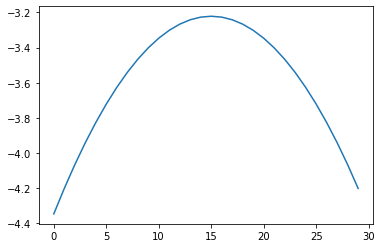

In [4]:
sd = 10 #known variance
x = 15 #1 observation
mu = np.arange(0,30,1) #range of possible values of mu, arbitrarily chosen

l = [gauss_log_l(x,i,sd) for i in mu]

fig = plt.figure()
ax1 = fig.add_subplot()
ax1.plot(mu,l)


WOOHOO IT WORKS !

notice maximum liklihood occurrs when mu = observation (Ilog likelihood so value is negative, also notive how the area !=1 not just because of the log, but the way of interpreting likelihood - PDFs are built to have area 1 for all possible X's but not for all thetas - this is the distinction) 

now trying this with a sample of X's


# playing around with likelihood funcitons

(array([ 2.,  1.,  6., 11., 15., 23., 16., 18.,  5.,  3.]),
 array([14.2 , 14.34, 14.48, 14.62, 14.76, 14.9 , 15.04, 15.18, 15.32,
        15.46, 15.6 ]),
 <BarContainer object of 10 artists>)

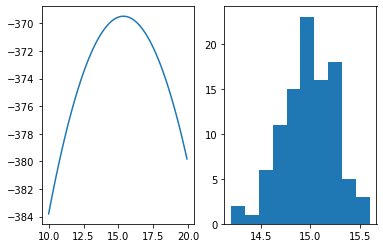

In [5]:
#trying ML from a sample or normal r.v. to see if it picks out the right mu

np.random.seed(seed = 4)

#observations generated from mean = 15
X = stats.norm.rvs(loc = 15, scale = 10, size = 100)
#print(X)

sd = 10 #known variance
mu = np.arange(10,20,.1) #range of possible values of mu, arbitrarily chosen

l = [gauss_log_l(X,i,sd) for i in mu]

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(mu,l)

#plotting MLE estimates of 100 tries
trials = 100
estimates = []
for i in range(trials):
    #generate sample
    X = norm.rvs(loc = 15, scale = 10, size = 1000)
    #extract maximum likelihood
    l = [gauss_log_l(X,i,sd) for i in mu]
    #use maximimum lilelihood esitmate
    estimates.append(mu[ l.index(max(l))])

ax2 = fig.add_subplot(122)
ax2.hist(estimates)

#estimates look normal!



-361.4346307661772
-360.9699782340996


Text(0.5, 0, 'l')

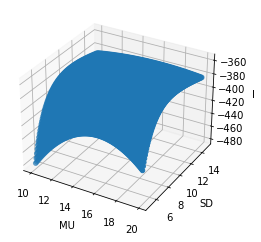

In [6]:
#Brief detour - 2D multivaraible plot of likelihood
X = X = stats.norm.rvs(loc = 15, scale = 10, size = 100)

mu = np.arange(10,20,0.1)
sd = np.arange(5,15,0.1)

MU,SD = np.meshgrid(mu,sd)

#l = gauss_log_l(15,MU,SD)

#trying to be a bit clever
l = np.array([gauss_log_l(X,i,j) for i,j in zip(MU.flatten(),SD.flatten())]).reshape((len(mu),len(sd)))

#debug
print(gauss_log_l(X,15,10))
print(gauss_log_l(X,16,10))

fig = plt.figure()
ax = fig.add_subplot(projection = "3d")
ax.scatter3D(MU,SD,l)
ax.set_xlabel('MU')
ax.set_ylabel('SD')
ax.set_zlabel('l')




his graph is beautiful - shows how the curvature of hte mu MLE depedns on SD

# Back to the information

If now we treat the sample as multiple individual likelihood "votes" we can build a grpah that looks like..

0.059785546875000005
0.0625


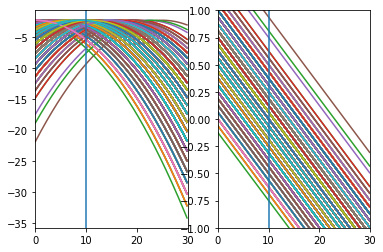

In [56]:
#trying ML from a sample or normal r.v. to see if it picks out the right mu


np.random.seed(seed = 1)

true_mu = 10
known_sd = 4
#observations generated from mean = 15
X = stats.norm.rvs(loc = true_mu, scale = known_sd, size = 1000)


sd = 10 #known variance
mu = np.arange(0,30,.1) #range of possible values of mu, arbitrarily chosen

ls = []
MU = []
ss = []
ts = []
for x in X:
    #so brute but good enough
    ls.append( [gauss_log_l(int(x),i,known_sd) for i in mu] ) #lieklihoods
    ss.append( [gauss_score_mu(int(x),i,known_sd) for i in mu] ) #scores for each value and mean
    MU.append(mu)


#plotting the various log likelihood function
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.set(xlim = (0,30))
for l in ls:
    ax1.plot(mu,l)
ax1.axvline(x = true_mu )

ax2 = fig.add_subplot(122)
ax2.set(xlim = (0,30), ylim = (-1,1))
for s in ss:
    ax2.plot(mu,s)
ax2.axvline(x = true_mu )




#extracting score values at true parameter 
ts = []
for s in ss:
    ts.append(s[int(np.where(mu == 15)[0])])
#print(ts)
print(np.std(ts)**2)
print((1/known_sd)**2)
 



Fischer information = variance of hte score value when evaluated at the "true" parameter value

can show that first moment of score under certain regularity condiitons is 0 so variance simplified to expected value of score**2

$I(\theta) = E[ ( \dfrac{\partial}{\partial \theta} \log f(X;\theta) )^2 | \theta] $

$I(\theta) = E[ ( score(X;\theta) )^2 | \theta] = \int (score(x;\theta))^2 f(x;\theta) dx $

Gives the information of an observation from a r.v. (with that parameter) as it integrates over all possible values of x

Under some more regularity conditons this further simplifies to 

$I(\theta) = E[  \dfrac{\partial^2}{\partial \theta^2} \log f(X;\theta)  | \theta] $

Thus the fisher information may be seen as hte curvature of hte support curve (the graph of hte log-likelihood) near the maximum likelihood estimate (THIS MAKES SO MUCH SENSE....)


For a normal distribution this simplifies.... 

$ I(\mu) = 1/\sigma^2 $


?Can we use the MLE estimate for the parameter rather than the actual true parameter value to calculate this for our data (not technically our data but the p.d.f we are estimating our data comes from...)

## **Exponential fischer information under the #exp_dist tab**

# **Medium tutorial - Bernoulli r.v. and Poission Process**

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8]
[11.130859259259259, 6.212399999999998, 4.796044444444444, 4.199340104166667, 3.999676, 4.166666666666668, 4.780852380952382, 6.221818750000003]
11.49441851851852


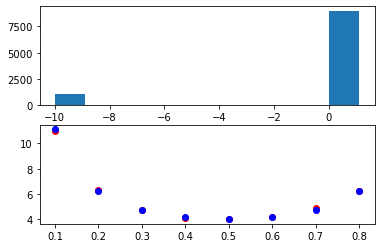

In [8]:
#Bernoulli r.v. fisher information simulated

def bernoulli_trials(p,n):
    return np.array([1 if np.random.uniform(0,1) < p else 0 for i in range(n)])

def bernoulli(p):
    return np.random.uniform(0,1) < p

def logl(p):
    #Log likleihood of singel bernoulli trial
    y = bernoulli(p)
    return (y*np.log(p) + (1-y)*np.log(1-p))

def score(p):
    ##Score for a single bernoulli trial
    #the log likelihood differentiated with respect to p
    y = bernoulli(p)
    return (y/p - (1-y)/(1-p))


def simulation(x):
    trials = 10000
    scores = [score(x) for i in range(trials)]
    v = np.sum(( scores - np.mean(scores))**2 )/trials
    return v

X = np.arange(0.1,0.9,0.1)
print(X)
print([simulation(i) for i in X])

trials = 10000
scores = [score(0.9) for i in range(trials)]
print(np.var(scores))

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.hist(scores)
ax2 = fig.add_subplot(212)
ax2.scatter(X,[simulation(i) for i in X],c = "red")
ax2.scatter(X,[1/(i*(1-i)) for i in X],c = "blue")

C:\Users\bruno\AppData\Local\Temp/ipykernel_8476/355361770.py:7: DeprecationWarning: Using factorial() with floats is deprecated
  return (np.exp(-lam*tau)*(lam*tau)**y)/math.factorial(y)
C:\Users\bruno\AppData\Local\Temp/ipykernel_8476/355361770.py:20: DeprecationWarning: Using factorial() with floats is deprecated
  - np.log( np.float64(math.factorial(y)))


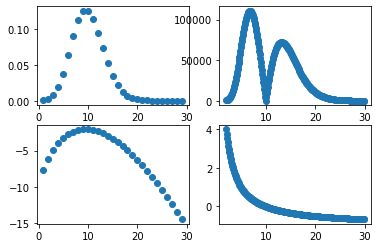

In [9]:
#Starting from a poisson process

def poisson(y,lam,tau):
    y = np.float64(y)
    #print((16*1)**y) #exceeds max value if you use np.int32 which is standard for arange

    return (np.exp(-lam*tau)*(lam*tau)**y)/math.factorial(y)

lam = 10
tau = 1

def dpoisson(y,lam,tau):
    lam = np.float64(lam)
    return np.abs((-tau*np.exp(-tau*lam)*((lam*tau)**y) + \
        np.exp(-lam*tau)*(y*tau)*((lam*tau)**(y-1))))

def logpoisson(y,lam,tau):
    y = np.float64(y)
    return -lam*tau + y*np.log(lam*tau) \
        - np.log( np.float64(math.factorial(y)))

def dlogpoisson(y,lam,tau):
    lam = np.float64(lam)
    return -tau + y/lam

Y = range(1,30)
L = np.arange(2,30,0.1)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.scatter(Y,[poisson(i,lam,tau) for i in Y])
ax2 = fig.add_subplot(222)
ax2.scatter(L,[dpoisson(10,i,tau) for i in L])
ax3 = fig.add_subplot(223)
ax3.scatter(Y,[logpoisson(i,lam,tau) for i in Y])
ax4 = fig.add_subplot(224)
ax4.scatter(L,[dlogpoisson(10,i,tau) for i in L])

In [10]:
#fischer information of poisson process

y = 10

